<a href="https://colab.research.google.com/github/ragoans/Modelo_Reg_Lin_Marketing/blob/main/_004_Modelo_de_Regress%C3%A3o_para_Marketing_Digital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Modelo de Regressão para Marketing Digital
A análise a ser realizada refere-se a um empresa que solicitou a análise exploratória de dados de budgets de marketing digital em diferentes mídias em relação ao valor de vendas alcançado. Além disto foi requisitado um modelo preditivo de valores alcançados com os produtos dados os valores das variáveis.

A base de dados a ser utilizada está no formato ".csv" e foi fornecida pela empresa, contendo as seguintes colunas:

  - youtube: Investimento realizado na plataforma Youtube.
  - facebook: Investimento realizado na plataforma Facebook.
  - newspaper: Investimento realizado em newspaper
  - sales: Valor alcançado de vendas pelo produto.
    
Para alcançar este fim foram definidas algumas premissas:
  - Inicialmente será realizada a análise exploratória dos dados a fim de buscar inconsistência nos dados, como nulidades e tipificação dos dados.
  - No caso de serem encontradas estas inconsistências será avaliada a necessidade de realização de drop das linhas ou aplicação de valores de média ou mediana, conforme for julgado mais coerente.
  - Será adotado a priori o modelo de regressão linear para o treinamento do modelo de machine learning e devidamente documentado.
  - No final da análise será realizado o teste do modelo, a análise da aderência dos dados e por fim a predição do valor alcançado com uma campanha fixados alguns dados.
  - Para avaliar a aderência dos dados serão utilizados os parâmetros MSE e RMSE.
  - Após os testes do modelo será realizada a otimização do mesmo por meio de um otimizador de hiperparâmetros do Scikitlearn (GridSearchCV).
  - A função desta análise inicial é uma apresentação gráfica e de teste do produto, sendo somente liberada para deployment após a apresentação para a equipe técnica responsável.


In [1]:
# Importação das bibliotecas
%pip install plotly
%pip install cufflinks
%pip install chart-studio



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.6 MB/s eta 0:00:00


In [46]:
from google.colab import files
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
import chart_studio.plotly as py
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from sklearn.metrics import r2_score


In [3]:
# Importação da base de dados
upload = files.upload()

Saving MKT.csv to MKT.csv


In [4]:
# Atribuição para um data frame
df = pd.read_csv('MKT.csv', sep=',')
df.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [5]:
# Analisando os tipos de dados e possíveis nulidades
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


- Dados não apresentam problemas de nulidade e estão no formato correto (`float`) já que todas as colunas se referem a valores financeiros (numéricos).

In [6]:
# Verificando dados duplicados
df.value_counts()

youtube  facebook  newspaper  sales
0.84     47.52     10.44      1.92     1
248.28   10.08     31.68      15.48    1
237.12   4.20      7.08       14.04    1
         27.96     17.04      19.92    1
238.68   59.28     72.00      28.44    1
                                      ..
120.48   11.52     4.32       12.84    1
123.24   35.52     10.08      16.80    1
125.52   6.84      41.28      12.48    1
128.88   16.80     13.08      13.80    1
355.68   43.56     121.08     28.56    1
Length: 171, dtype: int64

- O dataframe também não apresenta dados duplicados

In [7]:
# Análise geral estatística dos dados
df.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


- Nota-se uma dispersão maior nos valores investidos na plataforma do Youtube em comparação com os demais modelos de investimento.
- Porém o valor é bastante inferior ao valor médio e não indica para possíveis outliers, o que também fica nítido nos valores encontrados nos quantis.
- Outro fator que corrobora este argumento é o problema de negócio, em que pode-se não investir neste tipo de mídia, ou se investir em valores mais altos o que efetivamente acontece.
- Além disto os valores de venda são bem inferiores aos de investimento, o que sugere que as unidades de medida da coluna de sales em relação a de investimentos seja de uma uma ordem diferente, o que deve constar futuramente no modelo.
- No caso de já existir esta informação concreta, já seria realizada a correção, mas por hora para a utilização do modelo será necessário colocar a unidade conforme está sendo adicionada na tabela.

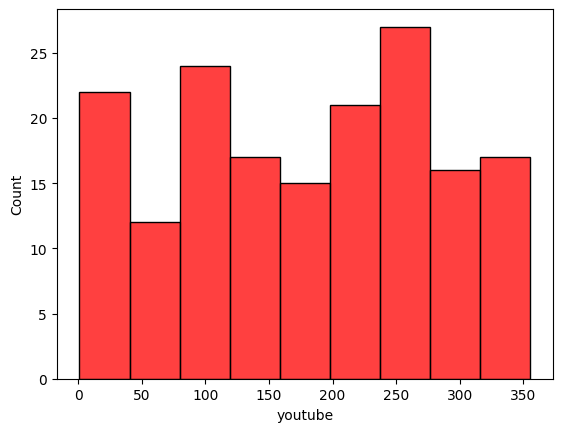

In [8]:
# Representação gráfica da dispersão dos dados
sns.histplot(df['youtube'], color='red');

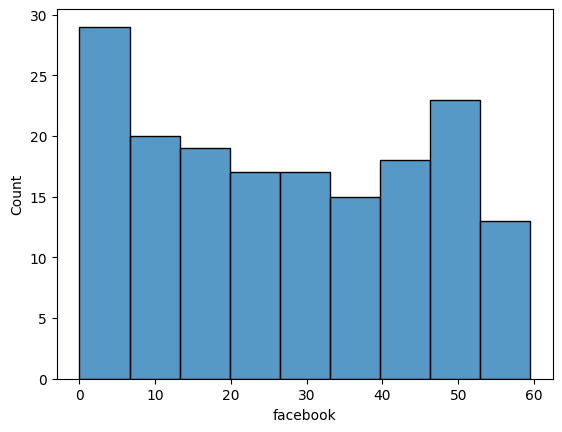

In [9]:
sns.histplot(df['facebook']);

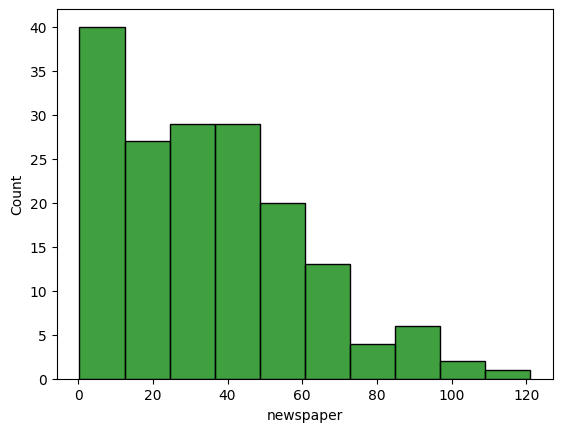

In [10]:
sns.histplot(df['newspaper'], color='green');

- É possível notar graficamente a quantidade maior de montantes referentes a investimentos no Youtube do que em relação aos demais mídias.
- Outro fator é alta variabilidade de montantes dispostos para verbas de marketing nessa mídia.
- Além disso é possivel notar uma grande quantidade de investimentos de menor valor nas mídias de newspaper.
- Quanto à mídia de Instagran, nota-se uma tendência de quantidades bastante análoga de investimentos em diferentes tamanhos de budget.

In [11]:
df.columns

Index(['youtube', 'facebook', 'newspaper', 'sales'], dtype='object')

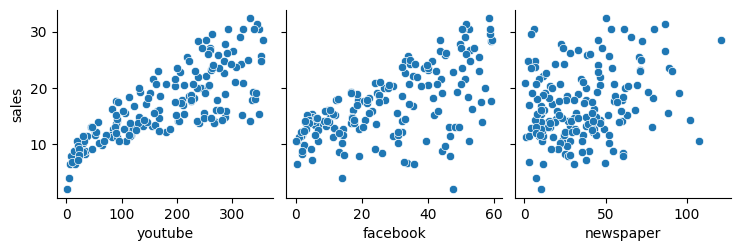

In [12]:
# Análise de correlação entre os dados
sns.pairplot(df, x_vars=['youtube', 'facebook', 'newspaper'], y_vars='sales');

- Conforme pode-se notar existe uma tendência de linearidade da função em especial no caso dos investimentos do youtube e facebook.
- No caso dos investimentos em newspaper a correlação é mais dispersa e aleatória e poderia indicar posteriormente para uma análise mais apurada de as variáveis youtube e facebook terem um grau de correlação linear maior com as vendas do que as variáveis newspaper.

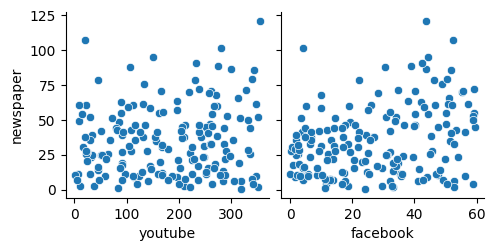

In [13]:
# Análise dos investimentos de newspaper em relação aos de youtube e facebook
sns.pairplot(df, x_vars=['youtube', 'facebook'], y_vars='newspaper');

In [14]:
# Modelagem

## Definição das variáveis, variáveis de treino e variáveis de teste
X = df[['youtube', 'facebook', 'newspaper']]
y = df[['sales']]

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size=0.3, random_state = 42)

- O modelo a ser utilizado será o de regressão linear do Scikitlearn. Segue abaixo a documentação:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression



In [15]:
## Modelo de Regressão linear sklearn

regLinear = LinearRegression().fit(X_train, y_train)

yLinear = regLinear.predict(X_test)

In [47]:
## Parâmetros de Aderência

R = r2_score(y_test, yLinear)
MSELin = mean_squared_error(y_test, yLinear)
RMSELin = np.sqrt(MSELin)

print(f'Erro r^2: {R}.')
print(f'MSE: {MSELin}.')
print(f'RMSE: {RMSELin}.')

Erro r^2: 0.882423505618885.
MSE: 4.699445585122349.
RMSE: 2.167820468840155.


- Será realizado um processo de otimização do resultado para melhorar a aderência dos dados pelo método do Scikitlearn "GridSearchCV".

- Segue link para documentação:

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [17]:
regLinear.get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'positive'])

In [18]:
# Definindo parâmetros para teste
parameters = {
	"copy_X": [True, False],
	"fit_intercept": [True, False],
	"n_jobs": [1,2,3,4,5],
  "positive": [True,False]
}

In [22]:
# Rodando otimização por GridSearchCV
regLinear_Grid = GridSearchCV(LinearRegression(), parameters, refit='neg_mean_square_error', verbose=1)

regLinear_GridModel = regLinear_Grid.fit(X_train, y_train)

regLinear_GridModel.best_params_

Fitting 5 folds for each of 40 candidates, totalling 200 fits


{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': True}

In [48]:
# Testando melhor resultado

yGrid = regLinear_GridModel.predict(X_test)

RGrid = r2_score(y_test, yGrid)
MSELinGrid = mean_squared_error(y_test, yGrid)
RMSELinGrid = np.sqrt(MSELinGrid)

print(f'Erro r^2: {RGrid}.')
print(f'MSE: {MSELinGrid}.')
print(f'RMSE: {RMSELinGrid}.')

Erro r^2: 0.8824796927714542.
MSE: 4.697199826159456.
RMSE: 2.1673024307095345.


- Como os hiperparâmetros otimizados foram próximos aos padrões, houve uma diferença irrelevante nos valores encontrados, assim será utilizado o modelo default.

In [37]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(119, 3)
(52, 3)
(119, 1)
(52, 1)


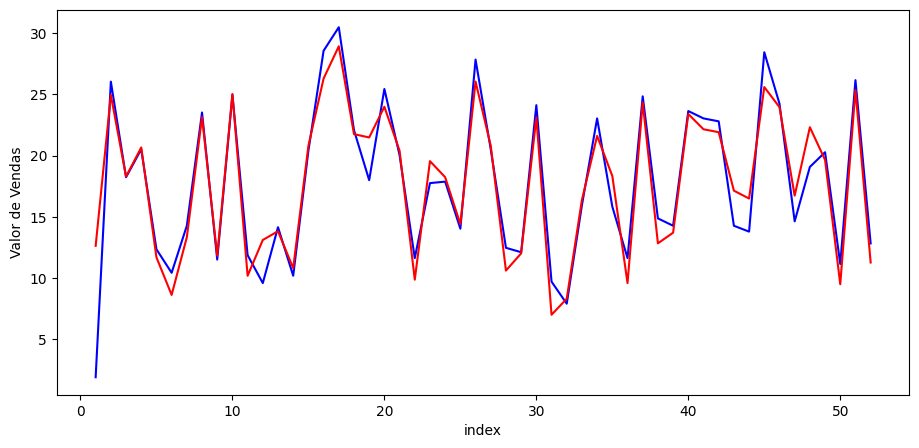

In [41]:
# Demonstrando graficamente a aderência dos dados

c = [i for i in range(1, 53, 1)]
fig = plt.figure(figsize=(11,5))
plt.plot(c, y_test, color='blue')
plt.plot(c, yLinear, color='red')
plt.xlabel('index')
plt.ylabel('Valor de Vendas');

In [43]:
# Cálculo da predição com o modelo de Regressão linear treinado
youtube = 200
facebook = 25
newspaper = 45
entrada = [[youtube, facebook, newspaper]]

resultado = regLinear.predict(entrada)[0]
print(f'O valor previsto para o valor de vendas é de {resultado[0]:.2f} com uma margem média de erro RMSE de {RMSELin:.2f}.')


O valor previsto para o valor de vendas é de 17.41 com uma margem média de erro RMSE de 2.17.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Conclusão
- Foi possível definir um modelo de predição com média de erro RMSE no valor de aproximadamente 2,17, o que equivale a aproximadamente 7,1% da amplitude total dos dados apresentados.
- Este valor possivelmente pode ser reduzido, caso seja analisada separadamente a relação com os valores de newspaper, onde percebeu-se um caráter de relação menos linearizado em relação ao valor alcançado em sales.
- Outra opção é uma futura reanálise com outro modelo para observar se pode haver uma redução nos desvios encontrados.
- Mesmo assim o valor encontrado para o r^2 foi relativamente próximo de 0,9 e o gráfico de aderência mostrou bastante precisão em grande parte dos dados, mesmo com desvios mais consideráveis em alguns pontos específicos.